In [4]:
import yfinance as yf

google_stock = yf.download('GOOGL', start='2004-08-19', end='2024-11-14')
google_stock.to_csv('google_stock_data.csv')

[*********************100%***********************]  1 of 1 completed


In [5]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pickle

google_stock = pd.read_csv('google_stock_data.csv')
google_stock.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,2.502503,2.604104,2.401401,2.511011,2.504808,893181924
1,2004-08-20,2.527778,2.729730,2.515015,2.710460,2.703765,456686856
2,2004-08-23,2.771522,2.839840,2.728979,2.737738,2.730976,365122512
3,2004-08-24,2.783784,2.792793,2.591842,2.624374,2.617892,304946748
4,2004-08-25,2.626627,2.702703,2.599600,2.652653,2.646101,183772044


In [6]:
google_stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5095 entries, 0 to 5094
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5095 non-null   object 
 1   Open       5095 non-null   float64
 2   High       5095 non-null   float64
 3   Low        5095 non-null   float64
 4   Close      5095 non-null   float64
 5   Adj Close  5095 non-null   float64
 6   Volume     5095 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 278.8+ KB


In [7]:
google_stock.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5095.000000,5095.000000,5095.000000,5095.000000,5095.000000,5.095000e+03
mean,47.057012,47.548396,46.572226,47.069116,46.959103,1.161436e+08
std,45.003093,45.492613,44.543285,45.022530,44.928202,1.472387e+08
min,2.482232,2.546046,2.401401,2.502753,2.496571,9.312000e+06
25%,13.170170,13.273023,12.999124,13.157783,13.125283,3.071800e+07
50%,27.914413,28.071821,27.684183,27.884886,27.816010,5.801180e+07
75%,62.210501,62.692499,61.603251,62.132250,61.978781,1.398960e+08
max,190.309998,191.750000,189.029999,191.179993,190.926636,1.643023e+09


In [8]:
google_stock.shape

(5095, 7)

In [9]:
google_stock.duplicated().sum()

0

In [10]:
google_stock.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [11]:
google_stock.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [12]:
X = google_stock[['Open']]  # Using only open since that's what everyone will know
y = google_stock['Close']   # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)


print(f'Mean Squared Error: {mse}')
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f'R-squared: {r2}')
n = len(y_test)
p = X.shape[1]
r2_adj = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print(f"Adjusted R^2: {r2_adj}")

Mean Squared Error: 0.6927366471630797
Root Mean Squared Error (RMSE): 0.8323080242092346
R-squared: 0.999659301904251
Adjusted R^2: 0.999658966901207


In [ ]:
with open('google_stock_prediction_model.pkl', 'wb') as f:
    pickle.dump(model, f)

In [13]:
print(f'Intercept: {model.intercept_}')


Intercept: 0.0009875737009679142


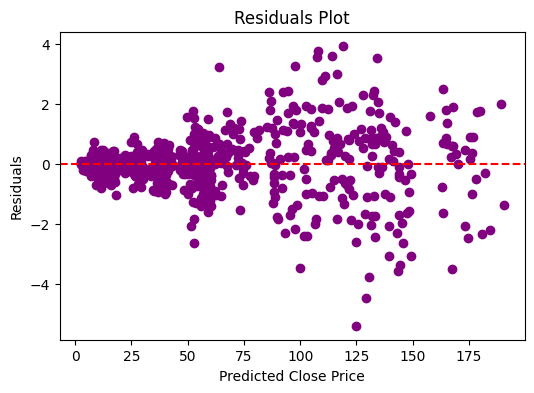

In [14]:
residuals = y_test - y_pred
plt.figure(figsize=(6,4))
plt.scatter(y_pred, residuals, color='purple')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals Plot')
plt.xlabel('Predicted Close Price')
plt.ylabel('Residuals')
plt.show()


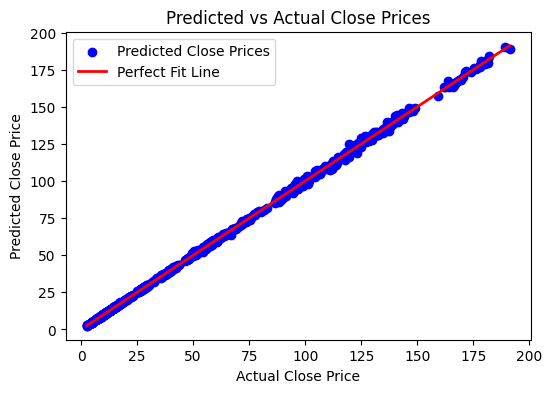

In [15]:
# Predicted vs. Actual Close Prices Plot
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred, color='blue', label='Predicted Close Prices')  # Points where the x-axis is actual and y-axis is predicted
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2, label='Perfect Fit Line')  # Line representing perfect prediction
plt.title('Predicted vs Actual Close Prices')
plt.xlabel('Actual Close Price')
plt.ylabel('Predicted Close Price')
plt.legend()
plt.show()

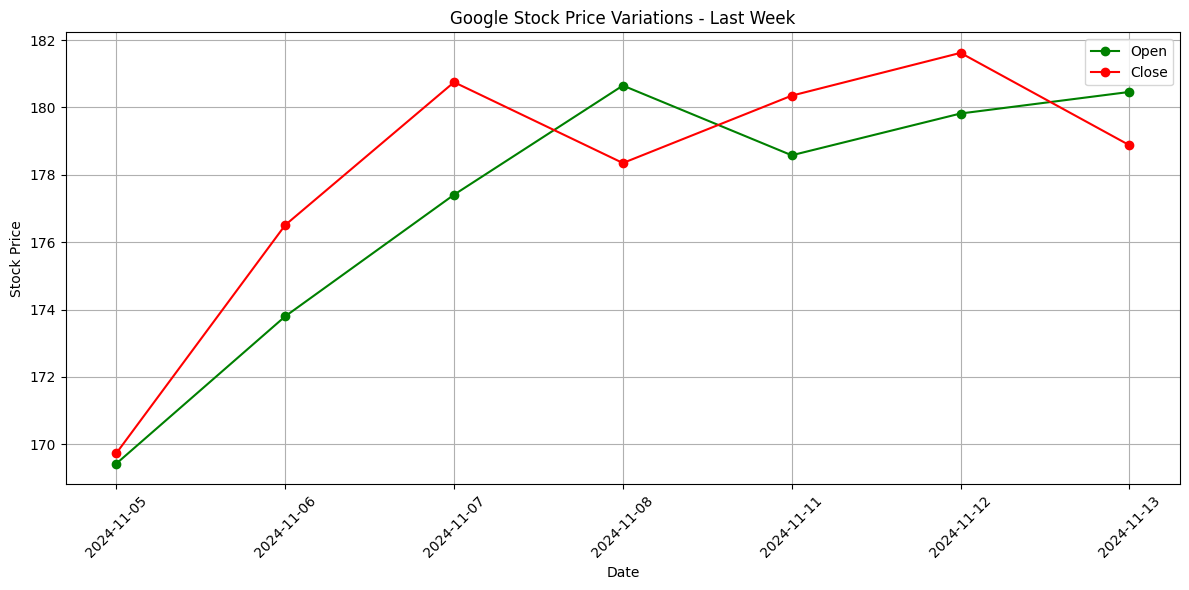

In [16]:
last_week_data = google_stock.tail(7)
plt.figure(figsize=(12, 6))
plt.plot(last_week_data["Date"], last_week_data["Open"], label="Open", color="green", marker="o")
plt.plot(last_week_data["Date"], last_week_data["Close"], label="Close", color="red", marker="o")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.title("Google Stock Price Variations - Last Week")
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


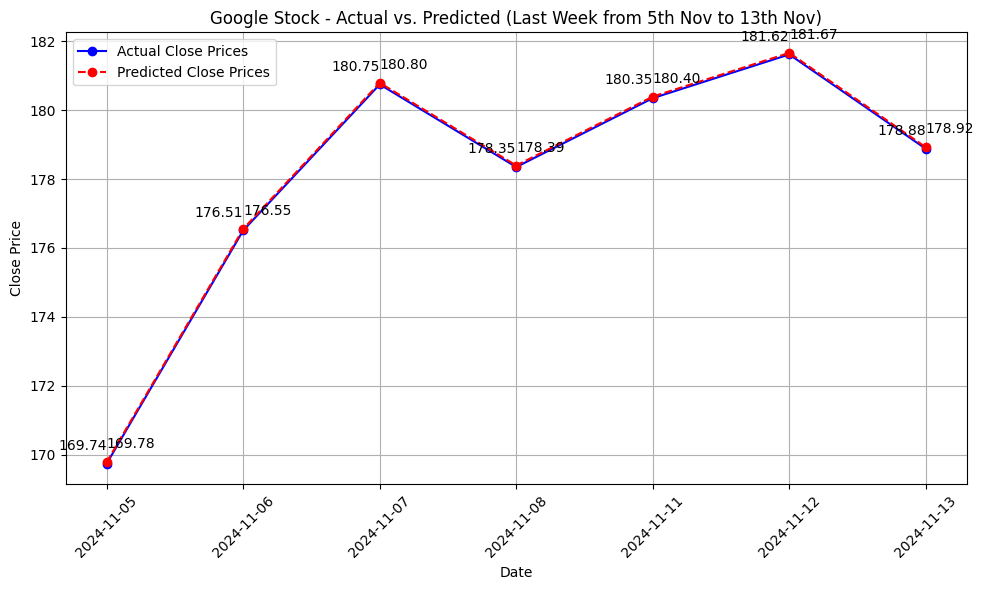

In [17]:
with open('google_stock_prediction_model.pkl', 'rb') as f:
    model1 = pickle.load(f)

last_week_data = google_stock[['Date', 'Close']].tail(7)
X_last_week = last_week_data['Close'].values.reshape(-1, 1) 
y_pred_last_week = model1.predict(X_last_week)
last_week_data['Predicted'] = y_pred_last_week
last_week_data.set_index('Date', inplace=True)

plt.figure(figsize=(10, 6))
plt.plot(last_week_data.index, last_week_data['Close'], color="blue", marker="o", label="Actual Close Prices")
plt.plot(last_week_data.index, last_week_data['Predicted'], color="red", marker="o", linestyle="--", label="Predicted Close Prices")

for x, y in zip(last_week_data.index, last_week_data['Close']):
    label = "{:.2f}".format(y)
    plt.annotate(label, (x,y), textcoords="offset points", xytext=(0,10), ha='right')

for x, y in zip(last_week_data.index, last_week_data['Predicted']):
    label = "{:.2f}".format(y)
    plt.annotate(label, (x,y), textcoords="offset points", xytext=(0,10), ha='left')


plt.title('Google Stock - Actual vs. Predicted (Last Week from 5th Nov to 13th Nov)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
